### Score Bing-Model to *Glass Pieces*
Bing-Model: 
 - trained on different interent images and cleaned after first training run to remove any "whacky images".
 - only uses piece-type class (6), not player-color class (6 * 2 = 12)




In [1]:
from fastai2.vision.all import *
from fastai2.vision.widgets import *
import time
import os
import pandas as pd

##### Load Model, `.predict()`

In [2]:
!ls models -sh

total 146M
48M bing-clean-2.pkl  46M chess1.pkl  53M stadard-piece-2.pkl


In [3]:
def piece_class_parse(fn): 
    fn = fn.split('_')[1]
    fn = fn.split('.')[0]
    return fn

In [4]:
learn = load_learner('models/bing-clean-2.pkl')

In [5]:
img_fns = os.listdir('app/data-glass')

In [6]:
classes = [e.split('-')[0] for e in list(learn.dls.vocab)]
classes

['bishop', 'king', 'knight', 'pawn', 'queen', 'rook']

In [7]:
preds = []
for _img in img_fns:
    preds.append(learn.predict('app/data-glass/' + _img))

### Compare activations

In [8]:
preds_proba = [e[2].tolist() for e in preds]
df = pd.DataFrame(preds_proba, columns=classes)
df0 = pd.DataFrame([e.split('.')[0] for e in img_fns]
                   , columns=['img_fn'])
df = pd.concat((df0, df), axis=1)
df.round(2)

,img_fn,bishop,king,knight,pawn,queen,rook
0,back-1,0.27,0.17,0.02,0.18,0.05,0.31
1,back-2,0.14,0.22,0.02,0.18,0.03,0.42
2,bishop,0.93,0.00,0.02,0.02,0.01,0.02
3,king,0.07,0.12,0.05,0.12,0.32,0.33
4,knight,0.85,0.00,0.05,0.09,0.00,0.01
5,pawn,0.68,0.00,0.02,0.29,0.01,0.00
6,queen,0.04,0.02,0.02,0.07,0.44,0.41
7,rook,0.00,0.00,0.02,0.00,0.02,0.95


### Build Cool Viz of Results

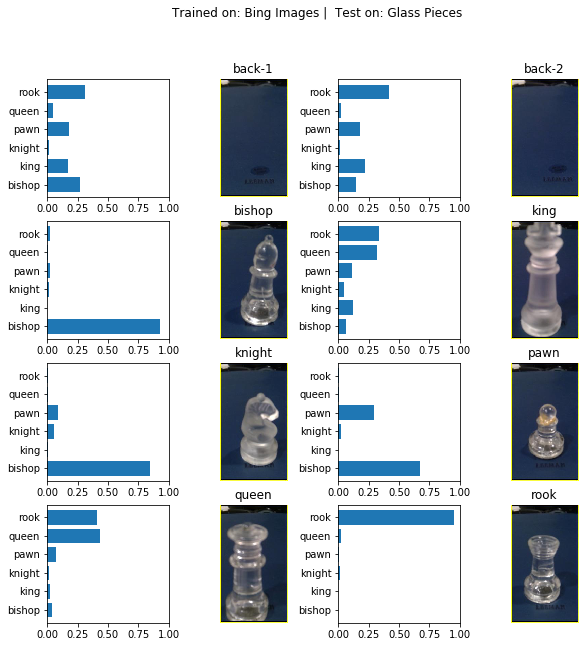

In [11]:
title = 'Trained on: Bing Images |  Test on: Glass Pieces'
img_dir = 'app/data-glass/'
N = len(df)
cols = 4
rows = N // (cols // 2)

fig, ax = plt.subplots(rows, cols, figsize=(2.5*cols,2.5*rows))
fig.suptitle(title)

counter = 0

for _row in range(rows):
    for _col in range(cols):
        
        _ax = ax[_row][_col]
        
        if (_col % 2 == 0):
            y = list(df.iloc[counter, 1:])
            x = list(df.columns[1:])
            _ax.barh(x, y)
            _ax.set_xlim(0.0, 1.0)
        else:
            fn = df.iloc[counter, 0] + '.jpg'
            img_fn = img_dir + fn
            _ax.imshow(Image.open(img_fn))
            _ax.axis('off')
            _ax.set_title(df.iloc[counter, 0])
            counter += 1
